In [1]:
from pykrx import stock
from pykrx import bond
import FinanceDataReader as fdr

from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings(action='ignore')
sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

In [2]:
def 포트폴리오(df):
    위험성 = df.cov()
    수익률 = df.mean()

    port_ret = []
    port_risk = []
    port_weights = []
    port_sharp = []

    stocks = df.columns
    
    for _ in range(50):
        weights = np.random.random(len(stocks))
        weights /= np.sum(weights)
        port_weights.append(weights)

        returns = np.dot(weights, 수익률)
        risk = np.sqrt( np.dot( weights.T, np.dot(위험성, weights)  )  )
        port_ret.append(returns)
        port_risk.append(risk)

        sharp = (returns - 0) / risk
        port_sharp.append(sharp)

    portfolio = {'Returns': port_ret, 'Risk': port_risk, 'Sharp': port_sharp}

    for i, s in enumerate(stocks):
        portfolio[s] = [weight[i] for weight in port_weights]
    df = pd.DataFrame(portfolio)
    return df

In [19]:
def 그림(df):
    return_high = df[df['Returns']  == df['Returns'].max()]
    risk_high = df[df['Risk']  == df['Risk'].max()]
    sharp_high = df[df['Sharp']  == df['Sharp'].max()]
    
    df.plot.scatter(x='Risk', y='Returns')
    plt.scatter(return_high['Risk'], return_high['Returns'], marker='*', s=500, c='red', label="리턴")
    plt.scatter(risk_high['Risk'], risk_high['Returns'], marker='*', s=500, c='blue', label="리스크")
    plt.scatter(sharp_high['Risk'], sharp_high['Returns'], marker='*', s=500, c='green', label="샤프")
    plt.legend()
    plt.show()

In [20]:
sdf = pd.read_csv("./kodex_stock.csv")
bdf = pd.read_csv("./kodex_bond10y.csv")

In [21]:
n_sdf = np.log(1 + sdf['close'].pct_change()).dropna()
n_bdf = np.log(1 + bdf['close'].pct_change()).dropna()

In [22]:
df = pd.DataFrame()

In [23]:
df['주식'] = n_sdf
df['채권'] = n_bdf

In [24]:
df = 포트폴리오(df)

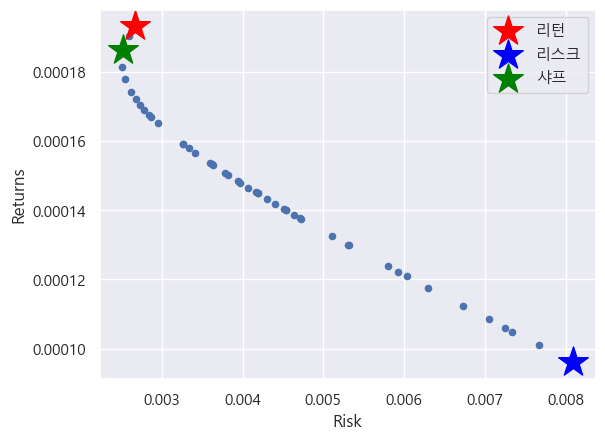

In [25]:
그림(df)

In [26]:
df[df['Returns']  == df['Returns'].max()]

,Returns,Risk,Sharp,주식,채권
30,0.000193,0.002671,0.072271,0.973382,0.026618
